In [127]:
import pandas as pd
import pvlib
from pvlib.location import Location
import matplotlib.pyplot as plt
import numpy as np
from sympy import*

In [106]:
tidszone = "Europe/Copenhagen"
start_dato = "2024-01-01"
slut_dato = "2024-12-31"
delta_tid = "Min"  # "Min", "H",

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.47092, 12.31168, tidszone, 10, "Danmarks Tekniske Universitet (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Højde er ca 50 m MOH

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:59", inclusive="left", freq=delta_tid, tz=tidszone
)

In [107]:
# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)

# Visualize the resulting DataFrame
solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2024-01-01 00:00:00+01:00,147.491022,147.491022,-57.491022,-57.491022,354.081669,-3.055576
2024-01-01 00:01:00+01:00,147.505050,147.505050,-57.505050,-57.505050,354.508799,-3.055906
2024-01-01 00:02:00+01:00,147.518026,147.518026,-57.518026,-57.518026,354.936201,-3.056235
2024-01-01 00:03:00+01:00,147.529950,147.529950,-57.529950,-57.529950,355.363856,-3.056565
2024-01-01 00:04:00+01:00,147.540819,147.540819,-57.540819,-57.540819,355.791743,-3.056895


Plot solens zenit-, azimut- og elevationsvinkel, dvs. 
, for hele dagen den 20. april 2024 som funktion af tiden:

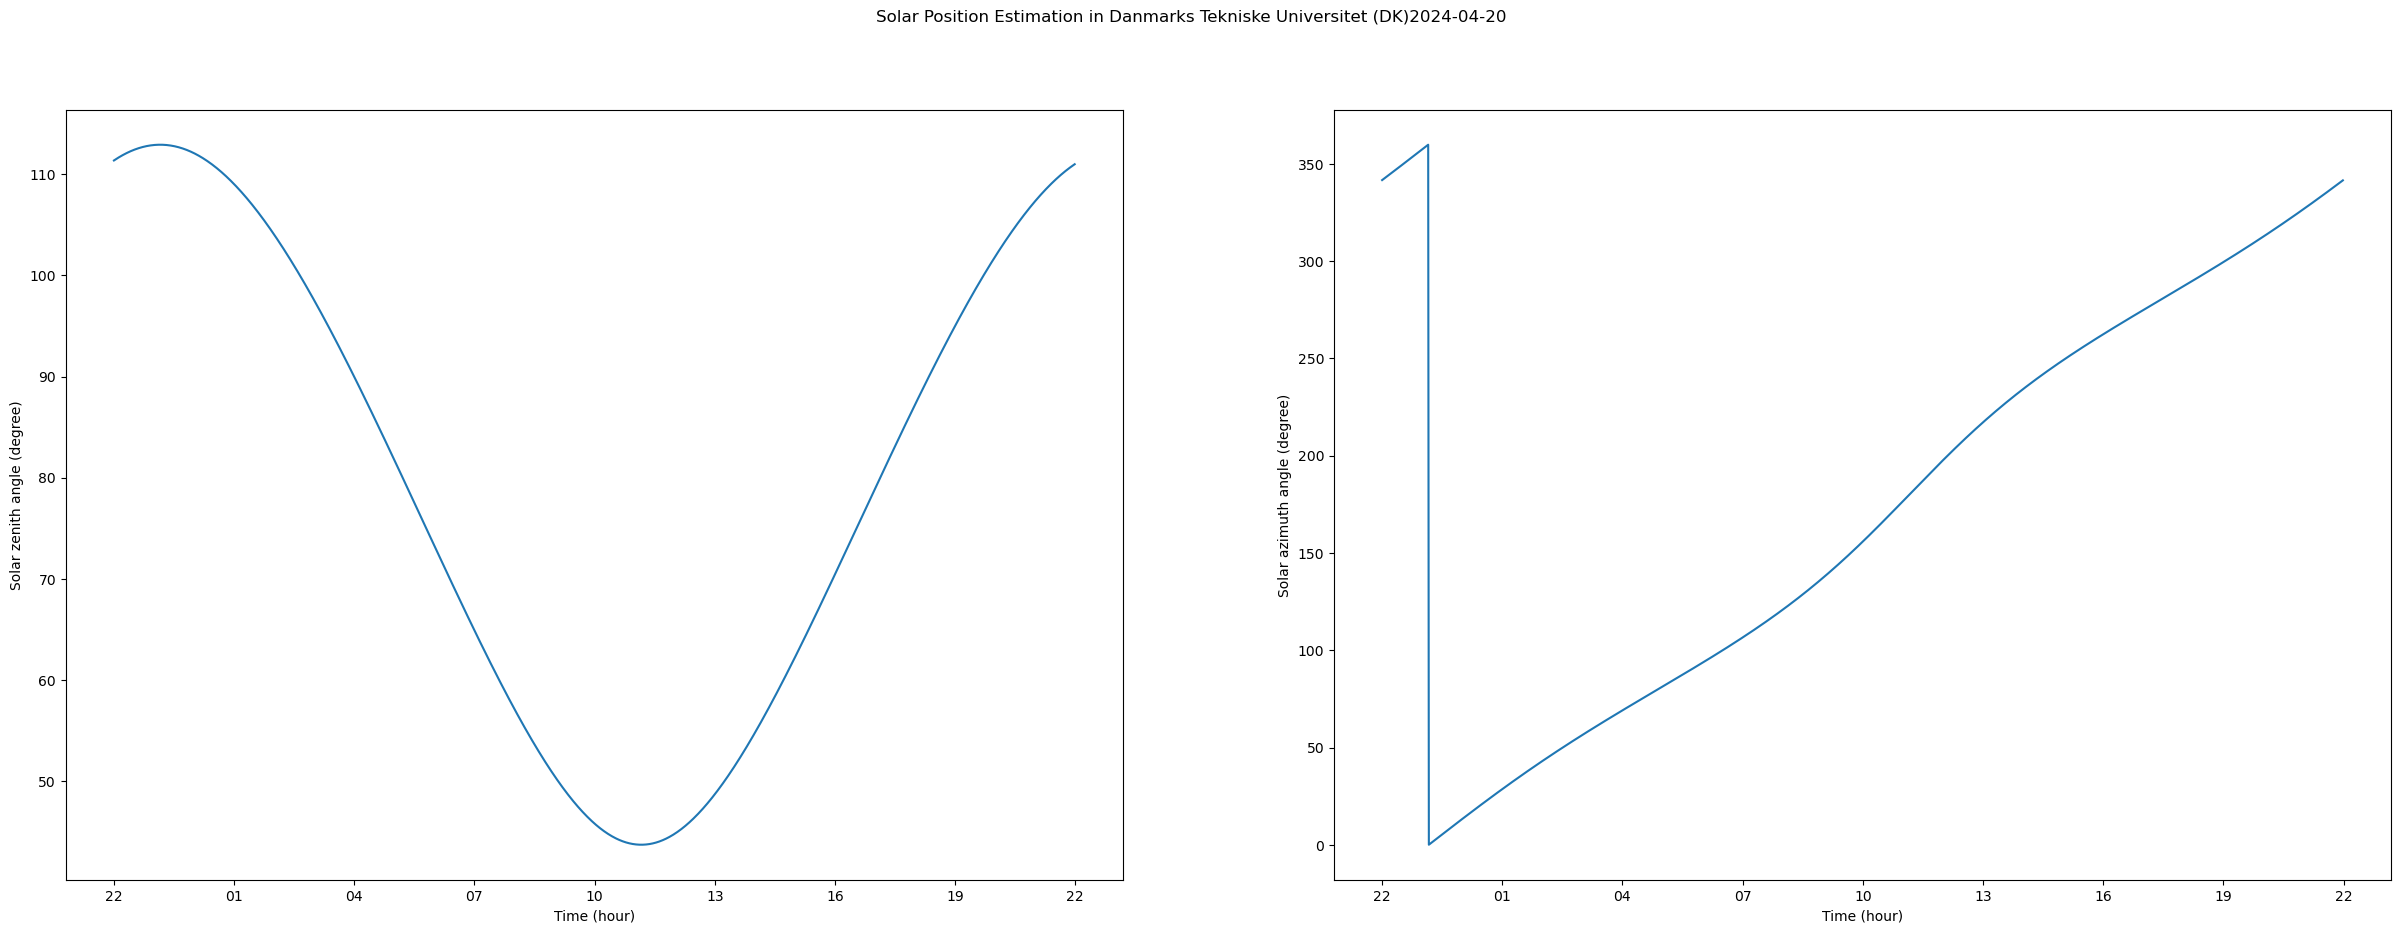

In [108]:
import matplotlib.dates as mdates

valgt_dato = "2024-04-20"

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots( 1, 2, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

# plot for solar zenith angle
ax1.plot(solpos.loc[valgt_dato].zenith)
ax1.set_ylabel("Solar zenith angle (degree)")
ax1.set_xlabel("Time (hour)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

# plot for solar azimuth angle
ax2.plot(solpos.loc[valgt_dato].azimuth)
ax2.set_ylabel("Solar azimuth angle (degree)")
ax2.set_xlabel("Time (hour)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

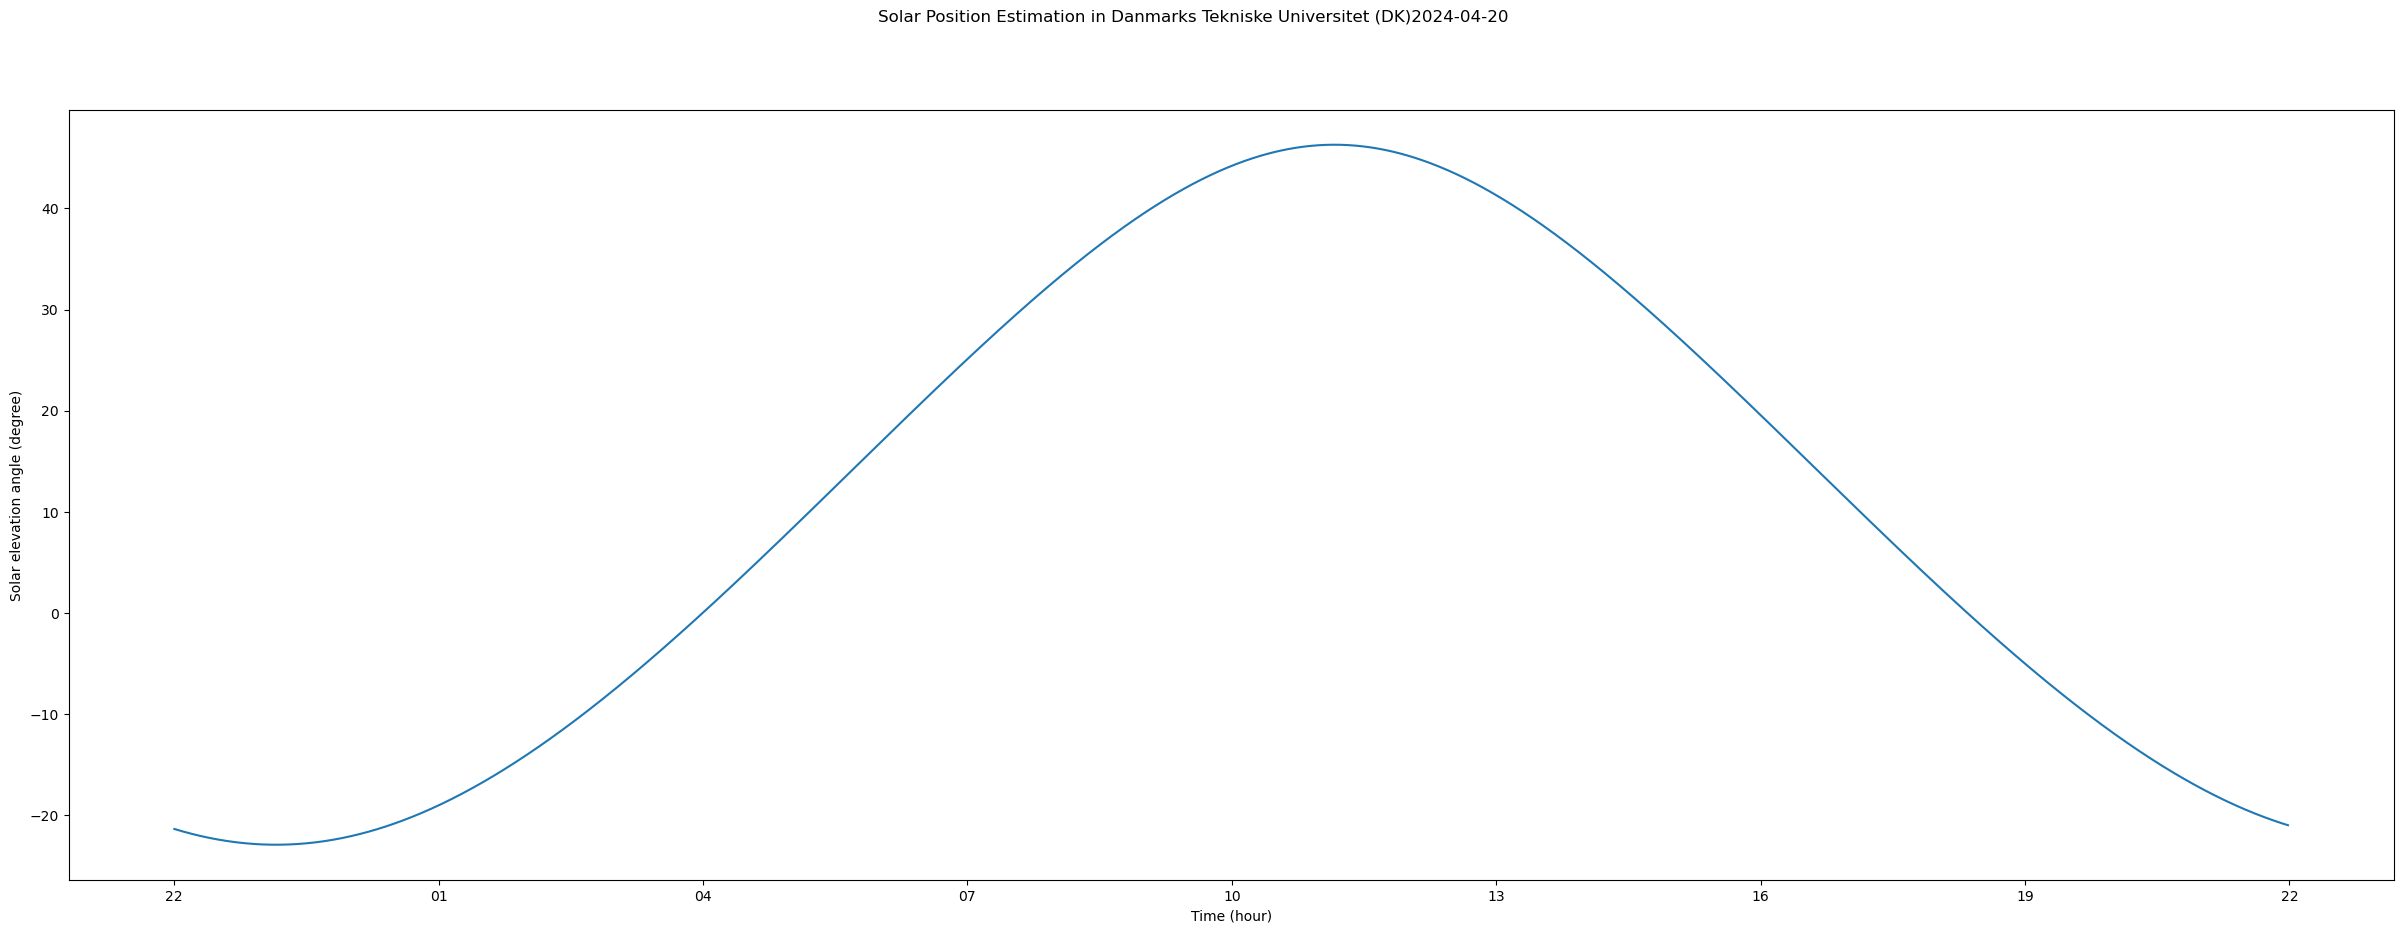

In [109]:
# Plots for elevationsvinkel
fig, (ax3) = plt.subplots(1, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

# plot for elevationsvinkel
ax3.plot(solpos.loc[valgt_dato].elevation)
ax3.set_ylabel("Solar elevation angle (degree)")
ax3.set_xlabel("Time (hour)")
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

In [110]:
valgt_dato = "2024-04-20"
print(solpos.loc[valgt_dato].zenith)
print(solpos.loc[valgt_dato].elevation)
print(solpos.loc[valgt_dato].azimuth)

2024-04-20 00:00:00+02:00    111.369868
2024-04-20 00:01:00+02:00    111.413961
2024-04-20 00:02:00+02:00    111.457446
2024-04-20 00:03:00+02:00    111.500321
2024-04-20 00:04:00+02:00    111.542585
                                ...    
2024-04-20 23:55:00+02:00    110.816058
2024-04-20 23:56:00+02:00    110.862889
2024-04-20 23:57:00+02:00    110.909120
2024-04-20 23:58:00+02:00    110.954749
2024-04-20 23:59:00+02:00    110.999775
Freq: min, Name: zenith, Length: 1440, dtype: float64
2024-04-20 00:00:00+02:00   -21.369868
2024-04-20 00:01:00+02:00   -21.413961
2024-04-20 00:02:00+02:00   -21.457446
2024-04-20 00:03:00+02:00   -21.500321
2024-04-20 00:04:00+02:00   -21.542585
                               ...    
2024-04-20 23:55:00+02:00   -20.816058
2024-04-20 23:56:00+02:00   -20.862889
2024-04-20 23:57:00+02:00   -20.909120
2024-04-20 23:58:00+02:00   -20.954749
2024-04-20 23:59:00+02:00   -20.999775
Freq: min, Name: elevation, Length: 1440, dtype: float64
2024-04-20 00:00:00+

##### Anbefales at arbejde i numpy arrays derfor:

In [111]:
np.array(solpos.loc[valgt_dato].elevation)

array([-21.36986766, -21.41396137, -21.45744637, ..., -20.90912019,
       -20.95474934, -20.99977543])

**Plot solens elevationsvinkel og find ud af hvornår på dagen solen står højest den 20. april 2024.**  
Forklar hvad det betyder når α_s < 0 eller θ_s > 90°.

(Timestamp('2024-04-20 13:10:00+0200', tz='Europe/Copenhagen'),
 46.31656779488341)

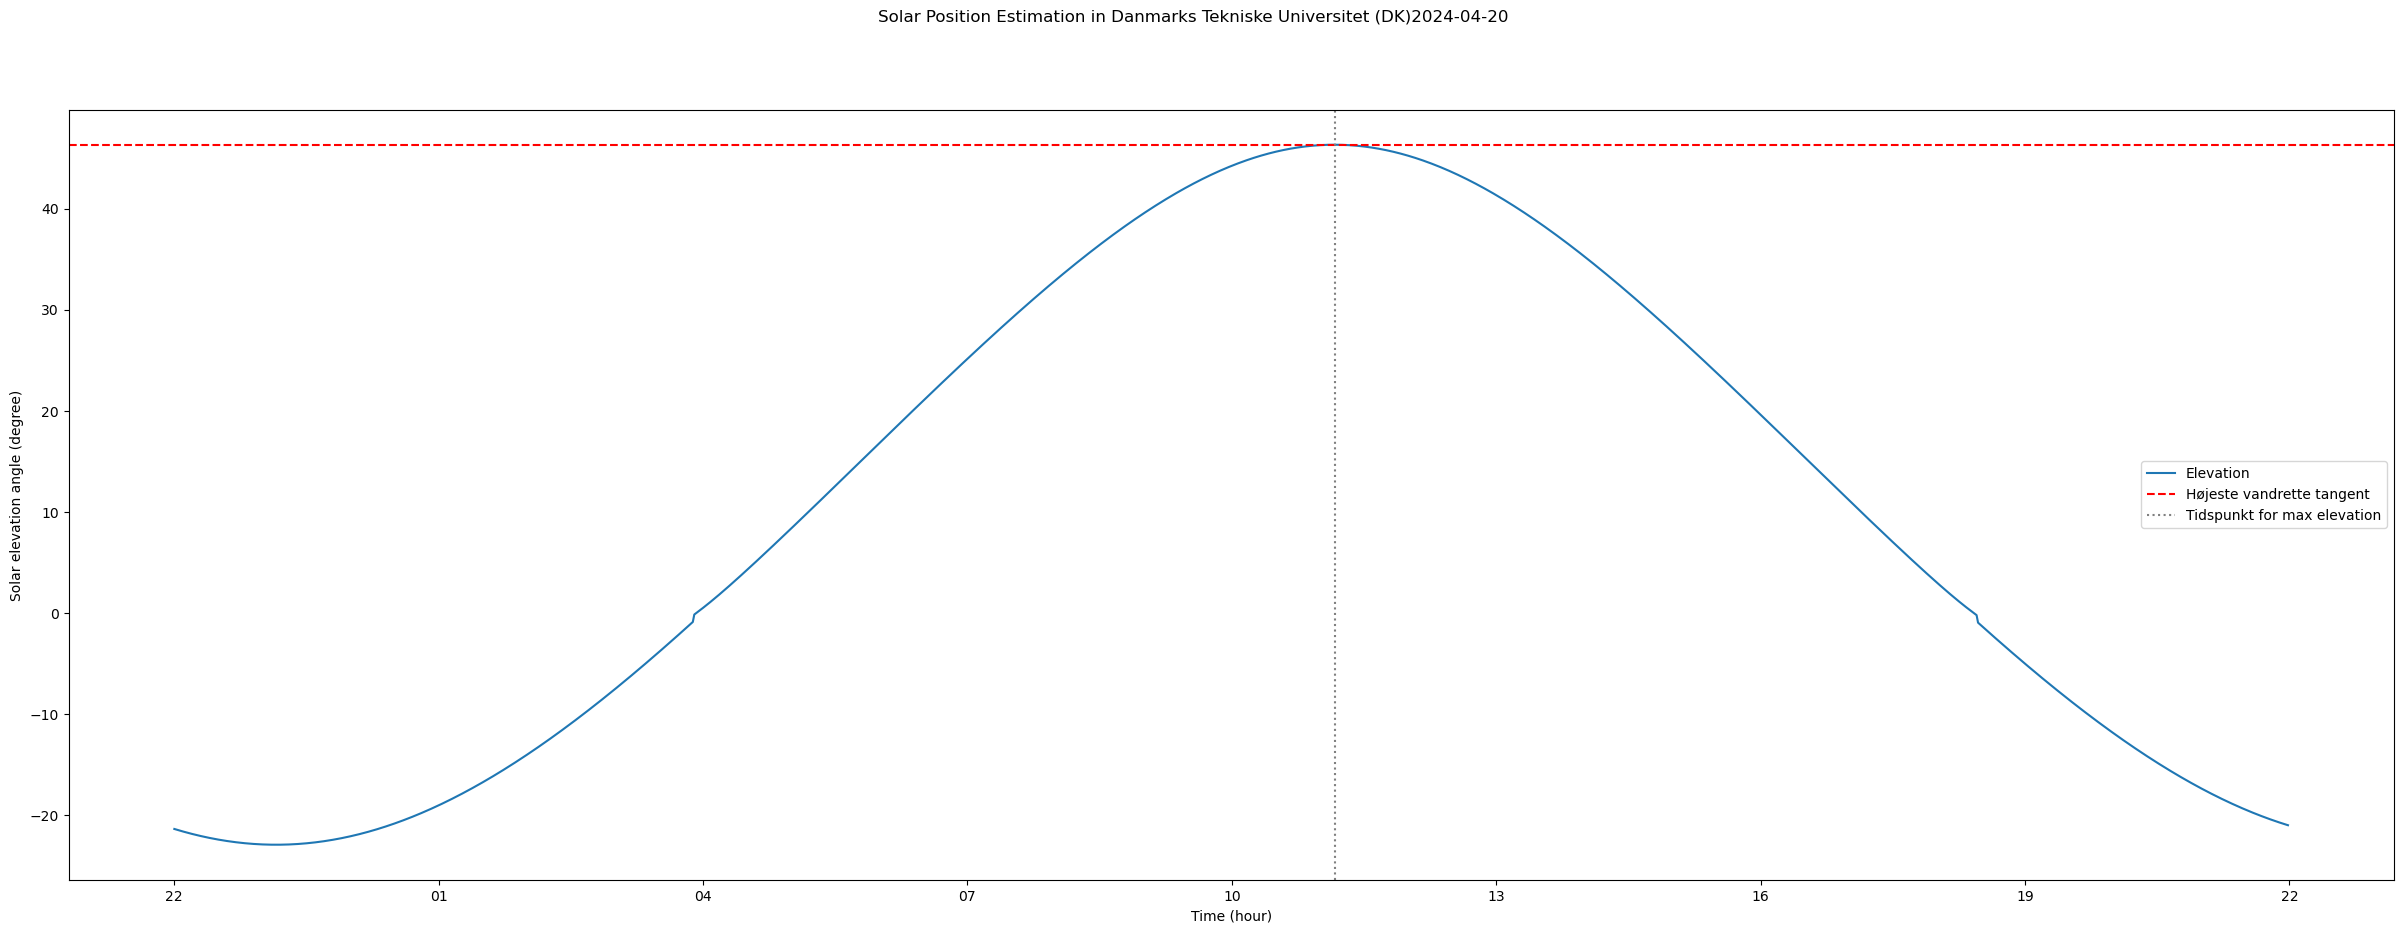

In [112]:
# Find tidspunktet for maksimal elevation (solen står højest)
max_elev_time = solpos.loc[valgt_dato].apparent_elevation.idxmax()
max_elev_value = solpos.loc[valgt_dato].apparent_elevation.max()

# Plot original data
fig, (ax3) = plt.subplots(1, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

ax3.plot(solpos.loc[valgt_dato].apparent_elevation, label="Elevation")
ax3.axhline(y=max_elev_value, color='red', linestyle='--', label="Højeste vandrette tangent")
ax3.axvline(x=max_elev_time, color='grey', linestyle=':', label="Tidspunkt for max elevation")

# Tilføj labels
ax3.set_ylabel("Solar elevation angle (degree)")
ax3.set_xlabel("Time (hour)")
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
ax3.legend()

# Konverter lokal tid til UTC, hvis det er nødvendigt
max_elev_time_utc = max_elev_time.tz_convert('UTC')


max_elev_time, max_elev_value

Solen står højest kl 13:10

**Find tidspunktet for solopgang og solnedgang på DTU den 20. april 2024.**  
Sammenlign med “kendte” værdier fx fra DMI.

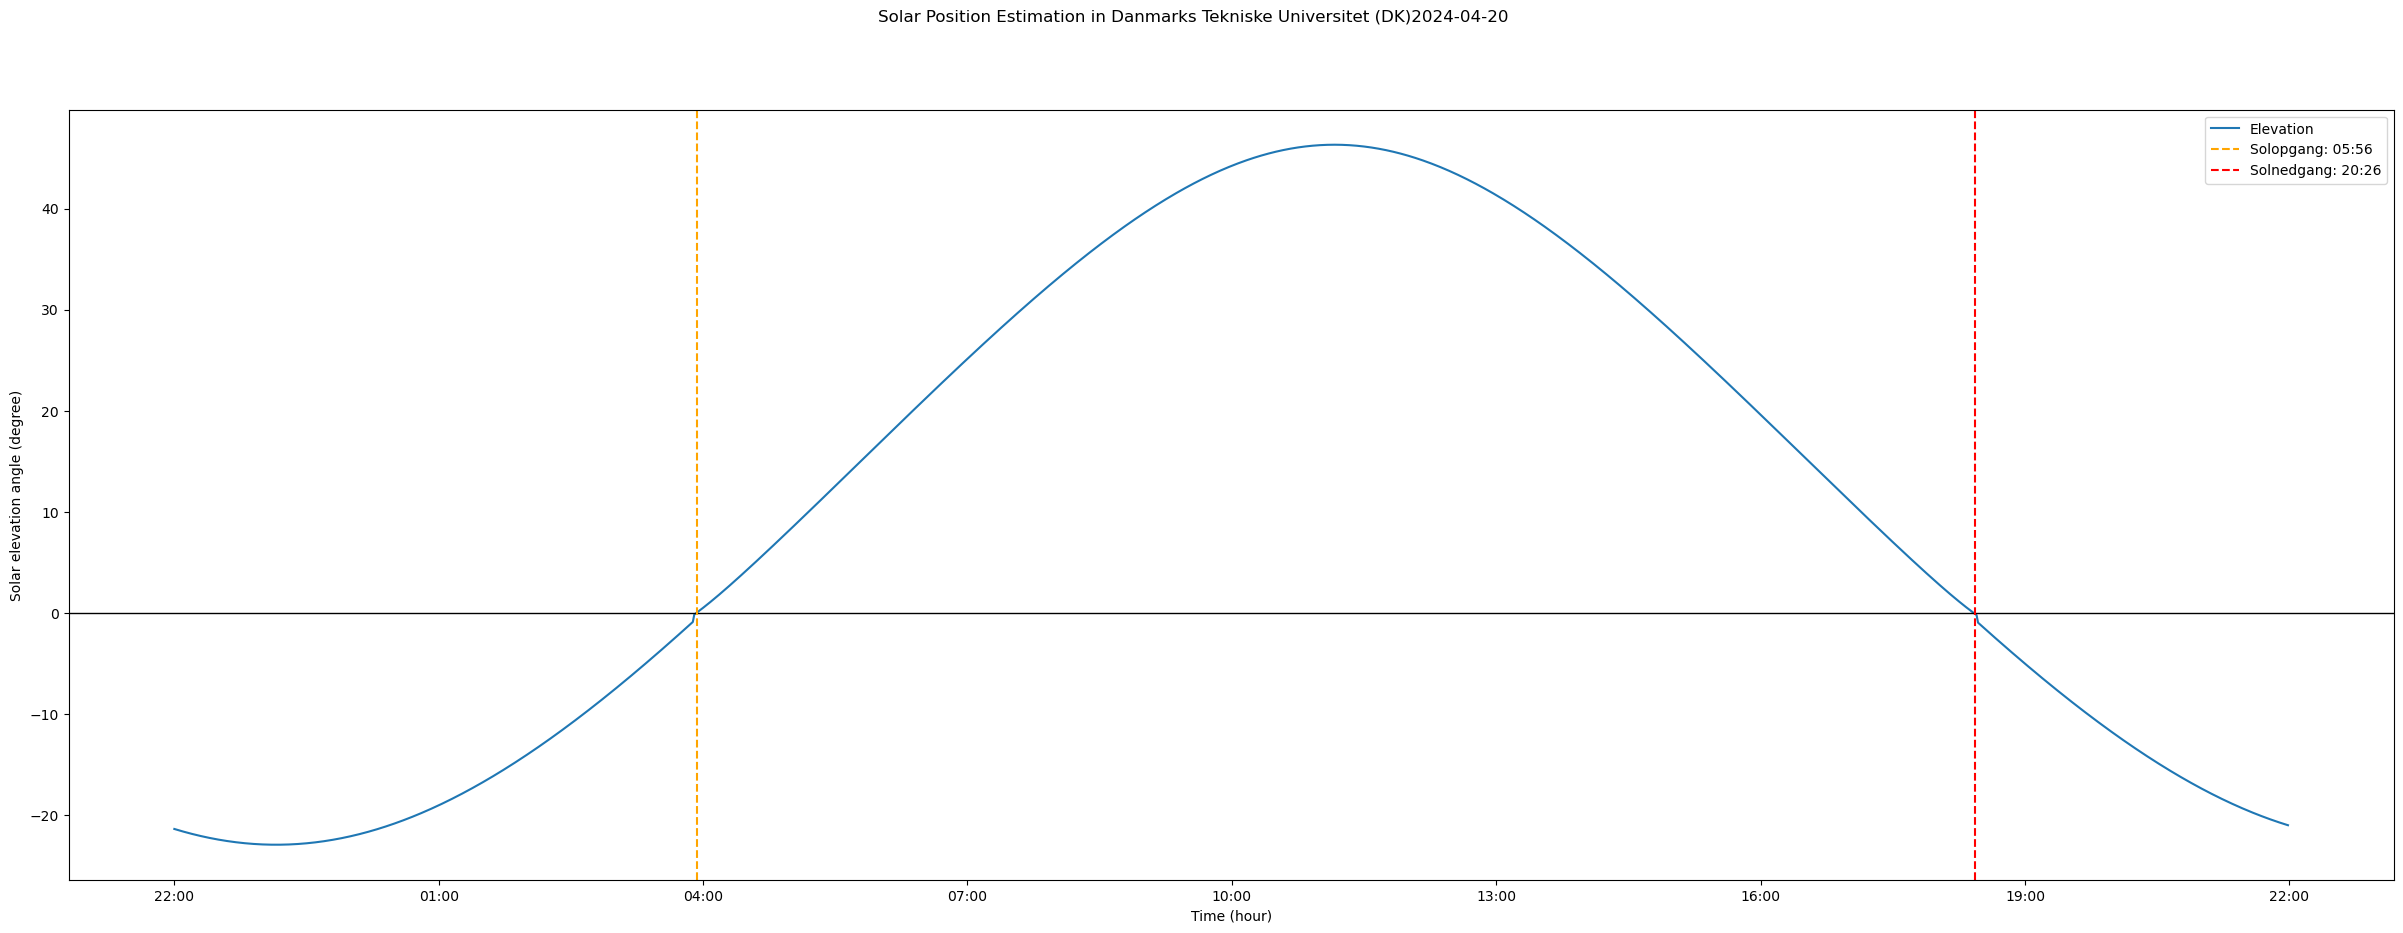

In [113]:
# Udtræk elevationen
elevation = solpos.loc[valgt_dato].apparent_elevation

# Find skæringer med 0-aksen
zero_crossings = elevation[elevation.shift(1) * elevation < 0]

# Interpolation for mere præcis tid
sunrise_time = zero_crossings.index[0]
sunset_time = zero_crossings.index[-1]

sunrise_value = elevation.loc[sunrise_time]
sunset_value = elevation.loc[sunset_time]

# Plot
fig, ax3 = plt.subplots(1, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

# Elevation plot
ax3.plot(elevation, label="Elevation")

# Linjer for solopgang og solnedgang
ax3.axhline(0, color='black', linestyle='-', linewidth=1)
ax3.axvline(sunrise_time, color='orange', linestyle='--', label=f"Solopgang: {sunrise_time.strftime('%H:%M')}")
ax3.axvline(sunset_time, color='red', linestyle='--', label=f"Solnedgang: {sunset_time.strftime('%H:%M')}")

# Labels og formattering
ax3.set_ylabel("Solar elevation angle (degree)")
ax3.set_xlabel("Time (hour)")
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax3.legend()

In [114]:
#Fra soltider.dk (kongens lyngby)
#Solopgang 05:50
#Solnedgang 20:26

Find solens højeste punkt på himlen (i grader) på sommersolhverv på DTU, og hvornår på dagen det sker?

In [115]:
""""
# Vælger sommersolhverv
tidszone = "Europe/Copenhagen"
start_dato = "2024--21"
slut_dato = "2024-06-21"
delta_tid = "Min"  # "Min", "H",

# Definition of Location object. Coordinates and elevation of Amager, Copenhagen (Denmark)
site = Location(
    55.47092, 12.31168, tidszone, 10, "Danmarks Tekniske Universitet (DK)"
)  # latitude, longitude, time_zone, altitude, name

# Højde er ca 50 m MOH

# Definition of a time range of simulation
times = pd.date_range(
    start_dato + " 00:00:00", slut_dato + " 23:59:59", inclusive="left", freq=delta_tid, tz=tidszone
)
"""
valgt_dato = "2024-06-21"

solpos_solhverv = site.get_solarposition(times)


(Timestamp('2024-06-21 13:13:00+0200', tz='Europe/Copenhagen'),
 57.97525693485552)

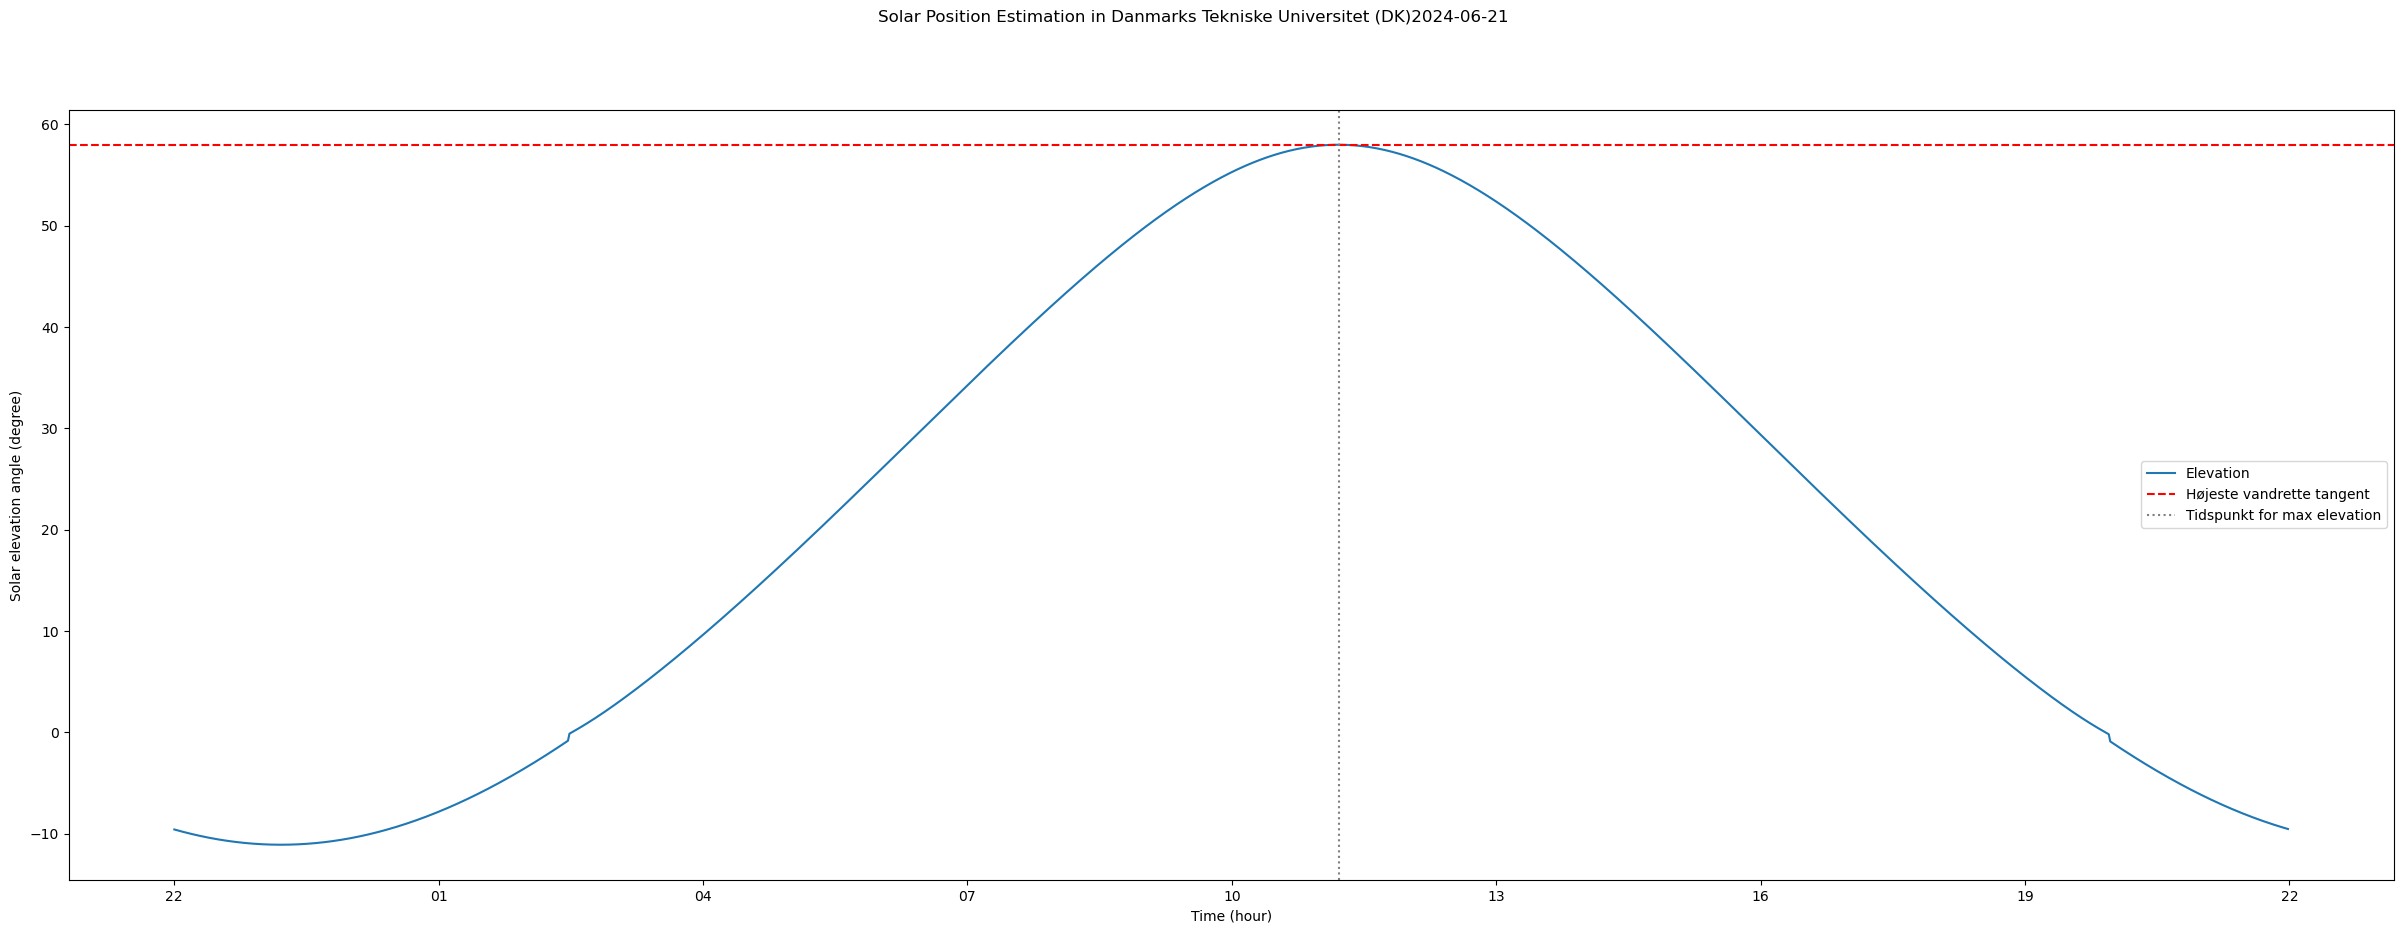

In [116]:
# Find tidspunktet for maksimal elevation (solen står højest)
max_elev_time = solpos_solhverv.loc[valgt_dato].apparent_elevation.idxmax()
max_elev_value = solpos_solhverv.loc[valgt_dato].apparent_elevation.max()

# Plot original data
fig, (ax3) = plt.subplots(1, figsize=(30, 10))
fig.suptitle("Solar Position Estimation in " + site.name + valgt_dato)

ax3.plot(solpos_solhverv.loc[valgt_dato].apparent_elevation, label="Elevation")
ax3.axhline(y=max_elev_value, color='red', linestyle='--', label="Højeste vandrette tangent")
ax3.axvline(x=max_elev_time, color='grey', linestyle=':', label="Tidspunkt for max elevation")

# Tilføj labels
ax3.set_ylabel("Solar elevation angle (degree)")
ax3.set_xlabel("Time (hour)")
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
ax3.legend()

# Konverter lokal tid til UTC, hvis det er nødvendigt
max_elev_time_utc = max_elev_time.tz_convert('UTC')


max_elev_time, max_elev_value

Solens højeste punkt sommersolhverv er 57.9... grader

Lav en Python-funktion som kan beregne solens højeste punkt 
alfa_max på himlen (i grader) på en given dato (year-month-day) i en given lokation (fx by) angivet ved en breddegrad og længdegrad.

In [117]:
def middag(længde, bredde, dato):
    site = Location(længde, bredde)
    sp = site.get_solarposition(times)
    print(sp.loc[dato].elevation.max())

middag(55.47092, 12.31168, "2024-12-22")

11.09270120654938


Skriv en Python-funktion (til brug med NumPy arrays) der omregner fra solens zenit og azimut til solens position angivet i 
xyz-koordinaten. Husk om I regner i radianer eller grader. Her kan np.deg2rad()-funktionen være nyttig. Det er fint at bruge en cirka værdi for 
r_s men man kan finde en mere korrekt værdi ved: pvlib.solarposition.nrel_earthsun_distance(times) * 149597870700, hvor 149597870700 er antal meter på en astronomisk enhed AU.

In [134]:
r_s = (pvlib.solarposition.nrel_earthsun_distance(times) * 149597870700).idxmax() #r_s vi tager udgangspunkt i.
azimuth = site.get_solarposition(times).azimuth
azdeg = azimuth[-1]
zenith = site.get_solarposition(times).zenith
zedeg = zenith[-1]
azdeg, zedeg

/var/folders/l0/63p83jy90qvfptkz8nv996cm0000gn/T/ipykernel_8967/2003384346.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  azdeg = azimuth[-1]
/var/folders/l0/63p83jy90qvfptkz8nv996cm0000gn/T/ipykernel_8967/2003384346.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  zedeg = zenith[-1]


(353.5074829080523, 147.41027306852897)

In [122]:
def sol_xyz(zenith_deg, azimuth_deg,times):
    r_s = (pvlib.solarposition.nrel_earthsun_distance(times) * 149597870700).max()
    # Konverter til radianer
    theta = np.deg2rad(zenith_deg)
    phi = np.deg2rad(azimuth_deg)
    # Beregn xyz-komponenter
    x = r_s * np.sin(theta) * np.cos(phi)
    y = r_s * np.sin(theta) * np.sin(phi)
    z = r_s * np.cos(theta)

    # Returnér som Nx3 array
    return np.vstack([x, y, z]).T
sol_xyz(zedeg, azdeg, times)

array([[ 8.13986916e+10, -9.26344082e+09, -1.28151764e+11]])

Skriv en Python funktion der omregner fra solens position på himlen i et 
xyz-koordinater til zenit og azimuth (i grader eller radianer). Her kan np.arctan2(y, x) og np.rad2deg() være nyttige.

In [132]:
z = np.array([[8.13986916e+10, -9.26344082e+09, -1.28151764e+11]])

def xyz_to_zenith_azimuth(xyz_array, degrees=True):
    x = xyz_array[:, 0]
    y = xyz_array[:, 1]
    z = xyz_array[:, 2]

    r = np.sqrt(x**2 + y**2 + z**2)
        
    theta = np.arccos(z / r)           # zenitvinkel
    phi = np.arctan2(y, x)             # azimut

    if degrees:
        theta = np.rad2deg(theta)
        phi = np.rad2deg(phi)

    return theta, phi
xyz_to_zenith_azimuth(z)

(array([147.410273]), array([-6.49251709]))

Omregner xyz-koordinater til (zenitvinkel, azimut).
    
    Parameters:
    xyz_array : array med shape (N, 3) — hver række er [x, y, z]
    degrees   : hvis True returneres vinkler i grader, ellers i radianer
    
    Returnerer:
    tuple (zenith, azimuth) — hver som array af længde N